In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('Transformed Data Set - Logistics regression.csv')
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [7]:
data.describe(include='object').T

,count,unique,top,freq
Favorite Color,66,3,Cool,37
Favorite Music Genre,66,7,Rock,19
Favorite Beverage,66,6,Doesn't drink,14
Favorite Soft Drink,66,4,Coca Cola/Pepsi,32
Gender,66,2,F,33


In [9]:
data['Favorite Color'].value_counts()

Favorite Color
Cool       37
Warm       22
Neutral     7
Name: count, dtype: int64

In [11]:
data['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: count, dtype: int64

In [13]:
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [15]:
data.replace({'Gender':{'F':0,'M':1}},inplace = True)

In [17]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,1
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,1
63,Neutral,Hip hop,Doesn't drink,Fanta,1
64,Cool,Rock,Wine,Coca Cola/Pepsi,1


In [71]:
data.replace({'Favorite Color':{'Cool':0,'Neutral':1,'Warm':2}},inplace=True)

In [73]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le=LabelEncoder()

In [77]:
data.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [79]:
for i in ['Favorite Music Genre','Favorite Beverage',
          'Favorite Soft Drink']:
    data[i] = le.fit_transform(data[i])

In [81]:
data.dtypes

Favorite Color          int64
Favorite Music Genre    int32
Favorite Beverage       int32
Favorite Soft Drink     int32
Gender                  int64
dtype: object

In [83]:
X = data.drop('Gender',axis=1)
y=data['Gender']

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [89]:
from sklearn.preprocessing import StandardScaler

In [91]:
sdc = StandardScaler()

In [93]:
for i in [X_train,X_test]:
    i = sdc.fit_transform(i)

In [95]:
from sklearn.linear_model import LogisticRegression

In [97]:
LR = LogisticRegression()

In [99]:
LR.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_pred = LR.predict(X_test)

In [103]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [105]:
y_test

24    0
1     0
3     0
9     0
13    0
17    0
40    1
32    0
48    1
37    1
60    1
61    1
28    0
64    1
Name: Gender, dtype: int64

In [107]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_test,y_pred)

0.35714285714285715

In [111]:
from sklearn.metrics import confusion_matrix

In [113]:
cm = confusion_matrix(y_test,y_pred)

In [115]:
cm

array([[3, 5],
       [4, 2]], dtype=int64)

In [117]:
len(y_test)

14

<Axes: >

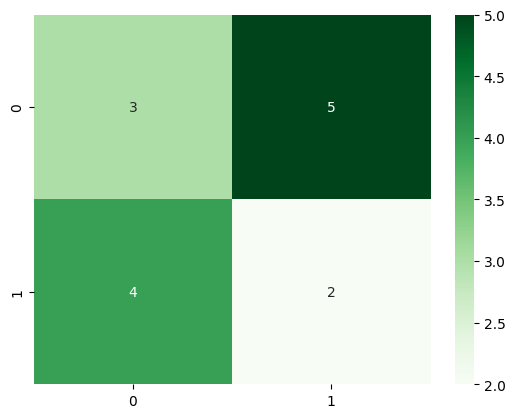

In [119]:
sns.heatmap(cm,annot=True,cmap = 'Greens')